In [114]:
import torch
import torchvision as tv
from matplotlib import pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


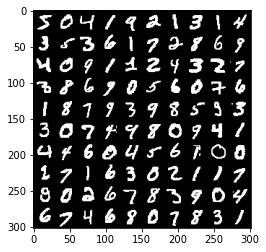

In [147]:
features = 784
classes = 10

source0 = tv.datasets.MNIST("../../MNIST", train=True, download=False)
source1 = tv.datasets.MNIST("../../MNIST", train=False, download=False)


DATA0 = source0.data.unsqueeze(1).float()
GRID = tv.utils.make_grid(DATA0[:100], nrow = 10)

plt.imshow(GRID.permute(1,2,0))


DATA0 = source0.data.flatten(1).float()
DATA1 = source1.data.flatten(1).float()
samples0 = DATA0.shape[0]
samples1 = DATA1.shape[0]
TARGET0 = source0.targets
TARGET1 = source1.targets

In [148]:
size1 = 1024
BIAS1 = torch.zeros(1, size1, requires_grad=True)
WEIGHT1 = torch.zeros(features, size1, requires_grad = True)

BIAS = torch.zeros(1, classes, requires_grad=True)
WEIGHT = torch.zeros(size1, classes, requires_grad = True)

torch.nn.init.xavier_normal_(WEIGHT1)

variables = [BIAS1, WEIGHT1, BIAS, WEIGHT]

def model(SIGNAL):
    SIGNAL = BIAS1 + SIGNAL @ WEIGHT1
    SIGNAL = torch.relu(SIGNAL)
    SIGNAL = BIAS + SIGNAL @ WEIGHT
    return SIGNAL

In [150]:
batch = 1000
opt = torch.optim.SGD(variables, lr = 0.1)

for epoch in range(100):
    LOSS0 = torch.zeros(())
    ACC0 = torch.zeros(())
    count0 = 0
    
    for index in range(0, samples0, batch):
        opt.zero_grad()
        DATA = DATA0[index : index + batch]
        TARGET = TARGET0[index : index + batch]
        count = TARGET.size(0)
        
        ACTIVATION = model(DATA)
        LOSS = torch.nn.functional.cross_entropy(ACTIVATION, TARGET)
        LOSS0 += LOSS*count
        
        with torch.no_grad():
            VALUE = torch.argmax( ACTIVATION, 1)
            ACC0 += torch.sum(VALUE == TARGET)
            count0 += count
        
        LOSS.backward()
        opt.step()
    LOSS0 /= count0
    ACC0 /= count0
    
    LOSS1 = torch.zeros(())
    ACC1 = torch.zeros(())
    count1 = 0
    for index in range(0, samples1, batch):
        with torch.no_grad():
            DATA = DATA1[index : index + batch]
            TARGET = TARGET1[index : index + batch]

            ACTIVATION = model(DATA)
            LOSS1 += torch.nn.functional.cross_entropy(ACTIVATION, TARGET, reduction="sum")
        
            VALUE = torch.argmax( ACTIVATION, 1)
            ACC1 += torch.sum(VALUE == TARGET)
            count1 += TARGET.size(0)
    LOSS1 /= count1
    ACC1 /= count1
    
    print("%5d %12.3f %4.3f %12.3f %4.3f" % (epoch, LOSS0, ACC0, LOSS1, ACC1), flush = True)


    0        2.301 0.112      171.413 0.114
    1        2.301 0.112      171.413 0.114
    2        2.301 0.112      171.413 0.114
    3        2.301 0.112      171.413 0.114
    4        2.301 0.112      171.413 0.114
    5        2.301 0.112      171.414 0.114
    6        2.301 0.112      171.414 0.114
    7        2.301 0.112      171.414 0.114
    8        2.301 0.112      171.414 0.114
    9        2.301 0.112      171.414 0.114
   10        2.301 0.112      171.414 0.114
   11        2.301 0.112      171.414 0.114
   12        2.301 0.112      171.414 0.114
   13        2.301 0.112      171.414 0.114
   14        2.301 0.112      171.414 0.114
   15        2.301 0.112      171.414 0.114
   16        2.301 0.112      171.414 0.114
   17        2.301 0.112      171.414 0.114
   18        2.301 0.112      171.414 0.114
   19        2.301 0.112      171.414 0.114
   20        2.301 0.112      171.414 0.114
   21        2.301 0.112      171.414 0.114
   22        2.301 0.112      17

KeyboardInterrupt: 